In [6]:
import pandas as pd
import pycountry # gives information about countries
import plotly.offline as py # to draw
from collections import Counter
pd.options.display.max_colwidth = 300


In [12]:
responses = pd.read_csv('C:/Users/prantor/datasets/survey_results_public.csv')
schema = pd.read_csv('C:/Users/prantor/datasets/survey_results_schema.csv')
print("schema shape:", schema.shape)
print("responses shape:", responses.shape)

schema shape: (129, 2)
responses shape: (98855, 129)


In [13]:
schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?
3,Country,In which country do you currently reside?
4,Student,"Are you currently enrolled in a formal, degree-granting college or university program?"


In [14]:
response.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, physics)","10,000 or more employees",Database administrator;DevOps specialist;Full-stack developer;System administrator,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or software engineering",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning a degree,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning a degree,"Computer science, computer engineering, or software engineering","10,000 or more employees",Data or business analyst;Desktop or enterprise applications developer;Game or graphics developer;QA or test developer;Student,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning a degree,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [37]:
df.columns.values

array(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student',
       'Employment', 'FormalEducation', 'UndergradMajor', 'CompanySize',
       'DevType', 'YearsCoding', 'YearsCodingProf', 'JobSatisfaction',
       'CareerSatisfaction', 'HopeFiveYears', 'JobSearchStatus',
       'LastNewJob', 'AssessJob1', 'AssessJob2', 'AssessJob3',
       'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7',
       'AssessJob8', 'AssessJob9', 'AssessJob10', 'AssessBenefits1',
       'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4',
       'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7',
       'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10',
       'AssessBenefits11', 'JobContactPriorities1',
       'JobContactPriorities2', 'JobContactPriorities3',
       'JobContactPriorities4', 'JobContactPriorities5',
       'JobEmailPriorities1', 'JobEmailPriorities2',
       'JobEmailPriorities3', 'JobEmailPriorities4',
       'JobEmailPriorities5', 'JobEmailPriorities6',
       'JobE

In [38]:
df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, physics)","10,000 or more employees",Database administrator;DevOps specialist;Full-stack developer;System administrator,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or software engineering",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning a degree,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning a degree,"Computer science, computer engineering, or software engineering","10,000 or more employees",Data or business analyst;Desktop or enterprise applications developer;Game or graphics developer;QA or test developer;Student,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning a degree,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [16]:
percent = responses.isnull().sum()/ len(response) *100
percent.sort_values(ascending = False)

TimeAfterBootcamp    93.270952
MilitaryUS           84.036215
HackathonReasons     74.011431
ErgonomicDevices     65.547519
AdBlockerReasons     61.817814
                       ...    
Employment            3.574933
Country               0.416772
OpenSource            0.000000
Hobby                 0.000000
Respondent            0.000000
Length: 129, dtype: float64

In [40]:
def surveyCountries():
    countries = df['Country'].value_counts()
    print(countries)

    countries = countries.to_frame().reset_index()
    print(countries)
    
    countries.loc[2]['code'] = 'test'
    pcnt = 0
    for i,country in enumerate(countries['index']):
        user_input = country
        mapping = {country.name: country.alpha_3 for country in pycountry.countries}
        countries.set_value(i, 'code', mapping.get(user_input))
        
        if pcnt < 5:
            print(user_input)
            print(mapping)
            
    data = [ dict(
            type = 'choropleth',
            locations = countries['code'],
            z = countries['Country'],
            text = countries['index'],
            colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
                [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'rgb(180,180,180)',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                tickprefix = '',
                title = 'Total Count'),
          ) ]

    layout = dict(
        title = 'countries which responded to the survey',
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict( data=data, layout=layout )
    py.iplot( fig, validate=False)

surveyCountries()

United States     20309
India             13721
Germany            6459
United Kingdom     6221
Canada             3393
                  ...  
Grenada               1
Mali                  1
Guinea-Bissau         1
Belize                1
San Marino            1
Name: Country, Length: 183, dtype: int64
              index  Country
0     United States    20309
1             India    13721
2           Germany     6459
3    United Kingdom     6221
4            Canada     3393
..              ...      ...
178         Grenada        1
179            Mali        1
180   Guinea-Bissau        1
181          Belize        1
182      San Marino        1

[183 rows x 2 columns]
United States
{'Aruba': 'ABW', 'Afghanistan': 'AFG', 'Angola': 'AGO', 'Anguilla': 'AIA', 'Åland Islands': 'ALA', 'Albania': 'ALB', 'Andorra': 'AND', 'United Arab Emirates': 'ARE', 'Argentina': 'ARG', 'Armenia': 'ARM', 'American Samoa': 'ASM', 'Antarctica': 'ATA', 'French Southern Territories': 'ATF', 'Antigua and Barbuda'

C:\Users\prantor\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\prantor\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [41]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [ ]:
 conda install --yes -c conda-forge ggplot


In [17]:
import matplotlib.pyplot as plt
import numpy as np


In [18]:
def get_list(col_name):
    full_list = ";".join(col_name)
    each_word = full_list.split(";")
    each_word = Counter(each_word).most_common()
    return pd.DataFrame(each_word)

In [29]:
print(responses.columns)

Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       ...
       'Exercise', 'Gender', 'SexualOrientation', 'EducationParents',
       'RaceEthnicity', 'Age', 'Dependents', 'MilitaryUS', 'SurveyTooLong',
       'SurveyEasy'],
      dtype='object', length=129)


In [102]:
ageGenderData = response[['Gender', 'Age']].dropna()
ageGenderData = ageGenderData[ageGenderData.Gender.isin(['Female', 'Male'])]
ageGenderData = ageGenderData[~ageGenderData.Age.isin(['Under 18 years old'])]
ageGenderData['count'] = 1
ageGenderData = ageGenderData.pivot_table('count', index = 'Age', columns = 'Gender', aggfunc = 'sum').fillna(0)

ageGenderData

Gender,Female,Male
Age,,
18 - 24 years old,1056,13611
25 - 34 years old,2091,28682
35 - 44 years old,524,10630
45 - 54 years old,159,3049
55 - 64 years old,48,873
65 years or older,8,151


In [103]:
type(ageGenderData)

pandas.core.frame.DataFrame

In [104]:
ageGenderData.keys()

Index(['Female', 'Male'], dtype='object', name='Gender')

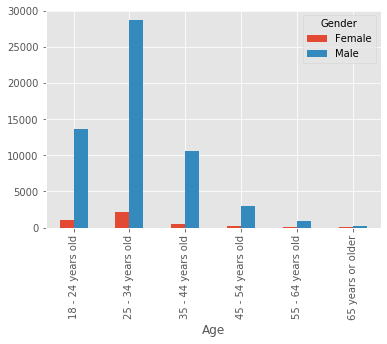

In [105]:
ageGenderData.plot.bar()

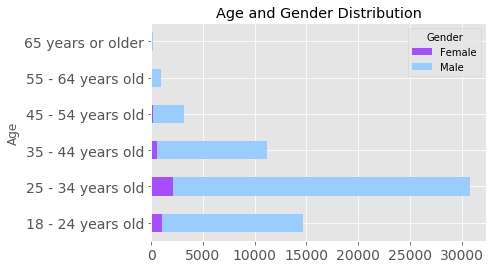

In [115]:
ageGenderData.plot.barh(stacked=True, color = ['#a64dff', '#99ccff'], legend=True, fontsize = 14, title = "Age and Gender Distribution")

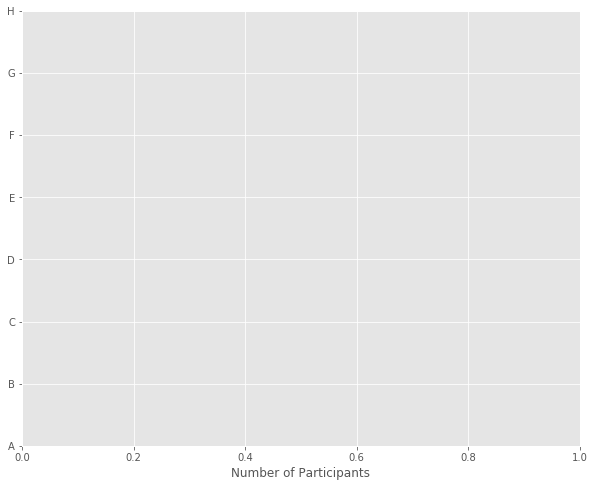

In [76]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.set_xlabel('Number of Participants')

plt.show()

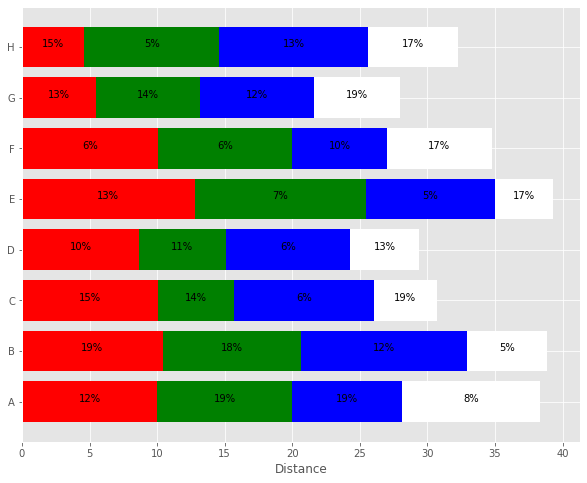

In [72]:
import numpy as np
import matplotlib.pyplot as plt
 
people = ('A','B','C','D','E','F','G','H')
segments = 4
 
# generate some multi-dimensional data & arbitrary labels
data = 3 + 10* np.random.rand(segments, len(people))
percentages = (np.random.randint(5,20, (len(people), segments)))
y_pos = np.arange(len(people))
 
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
 
colors ='rgbwmc'
patch_handles = []
left = np.zeros(len(people)) # left alignment of data starts at zero
for i, d in enumerate(data):
    patch_handles.append(ax.barh(y_pos, d, 
      color=colors[i%len(colors)], align='center', 
      left=left))
    # accumulate the left-hand offsets
    left += d
 
# go through all of the bar segments and annotate
for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
        ax.text(x,y, "%d%%" % (percentages[i,j]), ha='center')
 
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.set_xlabel('Distance')
 
plt.show()

AttributeError: Cannot access callable attribute 'unstack' of 'DataFrameGroupBy' objects, try using the 'apply' method

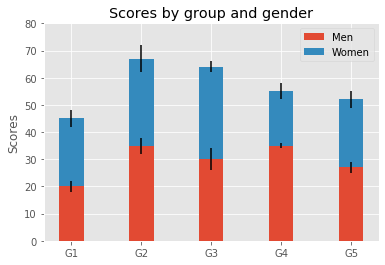

In [20]:
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()


array([21, 13, 21, 14,  7])
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
0          Between 7:01 - 8:00 AM
1          Between 6:01 - 7:00 AM
2          Between 8:01 - 9:00 AM
3          Between 5:00 - 6:00 AM
4    I do not have a set schedule
Name: 0, dtype: object
<class 'pandas.core.series.Series'>
0    I don't typically exercise
1          1 - 2 times per week
2          3 - 4 times per week
3     Daily or almost every day
Name: 0, dtype: object


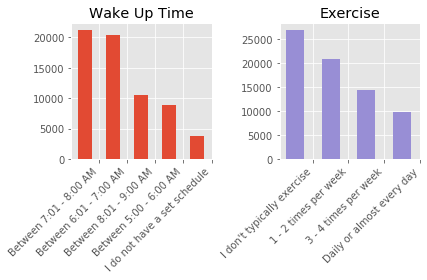

In [36]:
from pprint import pprint



plt.style.use('ggplot')
np.random.seed(19680801)


fig, axes = plt.subplots(ncols=2, nrows=1)
ax3, ax4 = axes.ravel()

# bar graphs

wakeData = get_list(responses['WakeTime'].dropna())

x = np.arange(5)

y1 = np.random.randint(1, 25, size=(5))
pprint(y1)
pprint(type(y1))
y1 = wakeData[1].head(5)
pprint(type(y1))

width = 0.5
ax3.bar(x, y1, width)
# ax3.bar(x + width, y2, width)
ax3.set_xticks(x + width)

pprint(wakeData[0].head(5))

ax3.set_xticklabels(wakeData[0].head(5), rotation=45, horizontalalignment="right")
ax3.title.set_text("Wake Up Time")


# bar graphs

del wakeData

exerciseData = get_list(responses['Exercise'].dropna())

x = np.arange(4)

y1 = exerciseData[1].head(4)
pprint(type(y1))

width = 0.5
ax4.bar(x, y1, width, color=list(plt.rcParams['axes.prop_cycle'])[2]['color'])
ax4.set_xticks(x + width)

pprint(exerciseData[0].head(4))

ax4.set_xticklabels(exerciseData[0].head(4), rotation=45, horizontalalignment="right")
ax4.title.set_text("Exercise")

plt.tight_layout()

plt.show()

In [37]:
import ggplot

ModuleNotFoundError: No module named 'ggplot'

In [ ]:
!conda install -c conda-forge ggplot 

In [1]:
!conda list


# packages in environment at C:\Users\prantor\Anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py37_0  
alabaster                 0.7.12                   py37_0  
anaconda                  2019.10                  py37_0  
anaconda-client           1.7.2                    py37_0  
anaconda-navigator        1.9.7                    py37_0  
anaconda-project          0.8.3                      py_0  
asn1crypto                1.0.1                    py37_0  
astroid                   2.3.1                    py37_0  
astropy                   3.2.1            py37he774522_0  
atomicwrites              1.3.0                    py37_1  
attrs                     19.2.0                     py_0  
babel                     2.7.0                      py_0  
backcall                  0.1.0                    py37_0  
backports                 1.0                        py_2  
backports.functools_lru_cache 1.5 

In [ ]:
!conda install --yes -c conda-forge/label/cf201901 ggplot 

In [1]:
!conda activate base

In [2]:
!conda config --remove channels defaults


CondaKeyError: 'channels': 'defaults' is not in the 'channels' key of the config file



In [3]:
!conda config --add channels conda-forge

In [ ]:
!conda install -c conda-forge --yes ggplot

In [1]:
!conda list


# packages in environment at C:\Users\prantor\Anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py37_0  
alabaster                 0.7.12                   py37_0  
anaconda                  2019.10                  py37_0  
anaconda-client           1.7.2                    py37_0  
anaconda-navigator        1.9.7                    py37_0  
anaconda-project          0.8.3                      py_0    conda-forge
asn1crypto                1.0.1                    py37_0  
astroid                   2.3.1                    py37_0  
astropy                   3.2.1            py37he774522_0  
atomicwrites              1.3.0                    py37_1  
attrs                     19.2.0                     py_0  
babel                     2.7.0                      py_0    conda-forge
backcall                  0.1.0                    py37_0  
backports                 1.0                        py_2    conda-f

In [2]:
import ggplot

ModuleNotFoundError: No module named 'ggplot'

In [3]:
!conda activate base

In [4]:
import ggplot

ModuleNotFoundError: No module named 'ggplot'